# 📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency

**Read the Dataset**

In [2]:
data = pd.read_excel("DM2425_ABCDEats_DATASET.xlsx", sheet_name="DM2425_ABCDEats_DATASET")

# 1. Exploration of the Dataset

**Initial Analysis**

To kick off our deep exploration, we’ll use the `data.info()` command to get an overview of the dataset. This command provides essential information, including the number of entries, column names, non-null counts, and data types for each variable. This quick summary will allow us to identify any missing values, spot potential data type issues, and gain a high-level understanding of the dataset's structure, setting the stage for further analysis.



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

**To visualize and get a sense of the data**

To begin familiarizing ourselves with the dataset, we’ll use the `data.head()` command, which displays the first few rows of the data. This preview allows us to quickly see the contents, spot-check variable values, and gain an initial sense of the data's structure and content. By viewing these rows, we can start to assess the data format, variable types, and any immediate patterns or issues that stand out.

In [4]:
data.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


**Check data types of our variables**

In this step, we’ll use the `data.dtypes` command to examine the data types of each variable in our dataset. This overview will confirm if the variables are appropriately typed (e.g., integers, floats, objects) and will help us spot any inconsistencies or unexpected types that might require adjustment. Understanding the data types at this stage is crucial, as it guides us in selecting suitable preprocessing and analysis techniques for each variable.

In [5]:
data.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

Since we don't agree with the fact that the variables in question (last_promo, payment_method and customer_region) are of type object we will change them to category in order to facilitate future analysis:

In [6]:
data['last_promo'] = data['last_promo'].astype('category')
data['payment_method'] = data['payment_method'].astype('category')
data['customer_region'] = data['customer_region'].astype('category')

We will divide the variables into lists for categorical and numerical variables to facilitate future interactions:

In [7]:
category_var = ['customer_region', 'last_promo', 'payment_method']

In [8]:
number_var = ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 
              'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 
              'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
              'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 
              'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 
              'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 
              'HR_21', 'HR_22', 'HR_23']

# 2. Summary of Important Statistics

In this section, we’ll start by generating a statistical summary using the `data.describe()` command. This summary provides key descriptive statistics for each numerical variable, such as the mean, standard deviation, minimum, and maximum values. By reviewing these statistics, we can understand the central tendencies, dispersion, and overall range of our data. 

Following this, we’ll delve into more detailed analyses, including frequency distributions for categorical variables, box plots, and histograms, each accompanied by summary boxes with key metrics. Together, these statistics and visualizations give us a comprehensive view of the data, setting a foundation for more advanced analyses.



In [9]:
data.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


So we can check that some variables have **outliers**

To do this, we will make a function to identify how many **outliers** we have:

In [10]:
def detect_outliers_summary(df, columns):
    outliers_data = []

    numeric_columns = df[columns].select_dtypes(include=['number']).columns
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        
        outliers_data.append({'Feature': col, 'Number of outliers': outlier_count})
    
    outliers_summary = pd.DataFrame(outliers_data)
    return outliers_summary

outliers_summary_table = detect_outliers_summary(data, number_var)
print(outliers_summary_table)

                     Feature  Number of outliers
0               customer_age                1083
1               vendor_count                1524
2              product_count                2371
3                   is_chain                3155
4                first_order                   0
5                 last_order                   0
6               CUI_American                3511
7                  CUI_Asian                3475
8              CUI_Beverages                5435
9                   CUI_Cafe                1366
10        CUI_Chicken Dishes                3248
11               CUI_Chinese                3522
12              CUI_Desserts                2016
13               CUI_Healthy                2169
14                CUI_Indian                3448
15               CUI_Italian                6448
16              CUI_Japanese                6301
17         CUI_Noodle Dishes                2226
18                 CUI_OTHER                7041
19  CUI_Street Food 

As we can see, there are quite a few outliers, which we'll deal with later.

For numerical variables, the statistics above are very effective, but for categorical variables we must count the frequency of each value

**Frequency of each value in Categorical Variables**

To gain insights into the distribution of categorical variables, we will compute the frequency of each unique value in these columns. By understanding the frequency of categories, we can identify dominant categories, assess data balance, and detect potential issues such as sparse categories or outliers that may affect our analysis.


In [11]:
for column in category_var:
    frequency_percentage = data[column].value_counts(normalize=True) * 100
    result = pd.DataFrame({'Value': frequency_percentage.index, 'Percentage': frequency_percentage.values})

    print(f"\033[1mColumn '{column}'\033[0m:")
    print(result)
    print("\n") 

Column 'customer_region':
  Value  Percentage
0  8670   30.610261
1  4660   29.948570
2  2360   27.687531
3  2440    4.650652
4  4140    2.687531
5  8370    1.552308
6  2490    1.395509
7     -    1.386101
8  8550    0.081535


Column 'last_promo':
      Value  Percentage
0         -   52.521325
1  DELIVERY   19.712745
2  DISCOUNT   14.099348
3   FREEBIE   13.666583


Column 'payment_method':
  Value  Percentage
0  CARD   63.224410
1  DIGI   19.132589
2  CASH   17.643001




### 2.1 Correlation

In this section, we examine the correlations between variables to identify relationships and dependencies within the dataset. By analyzing these correlations, we can detect variables that move together, uncover potential redundancies, and gain insights into which variables may have the most predictive power. This step is essential for refining our feature selection and improving model accuracy.


**Correlation table between Numeric Variables**

In [12]:
correlation_matrix = data[number_var].corr()

high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5 or abs(correlation_matrix.iloc[i, j]) < -0.5: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

high_corr_df

,Variable 1,Variable 2,Correlation
0,product_count,vendor_count,0.827636
1,is_chain,vendor_count,0.762916
2,is_chain,product_count,0.827071
3,DOW_0,vendor_count,0.583604
4,DOW_0,product_count,0.664765
5,DOW_0,is_chain,0.608362
6,DOW_1,vendor_count,0.581942
7,DOW_1,product_count,0.673689
8,DOW_1,is_chain,0.611363
9,DOW_2,vendor_count,0.584014


**Correlation between Categorical variables**

**Chi-Squared**

By applying this test, we aim to identify any meaningful relationships that might exist, helping us understand how different categories within the dataset interact with each other.

The results of this test will allow us to assess which pairs of categorical variables have dependencies and which are likely independent. This information is valuable for feature selection and model development, as highly correlated variables may contain redundant information, while weak or non-correlated variables can be excluded from certain analyses to simplify our models.

In [13]:
def chi2_test(var1, var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

combinations = [
    ("customer_region", "last_promo"),
    ("customer_region", "payment_method"),
    ("last_promo", "payment_method")
]

results = []
for var1, var2 in combinations:
    chi2_value, p_value = chi2_test(var1, var2)
    results.append({"Variable 1": var1, "Variable 2": var2, "Chi-Squared": chi2_value, "p-value": p_value})

resultss = pd.DataFrame(results)
resultss

,Variable 1,Variable 2,Chi-Squared,p-value
0,customer_region,last_promo,318.826462,2.661728e-53
1,customer_region,payment_method,153.989482,1.274089e-24
2,last_promo,payment_method,526.054824,2.046071e-110


*It is important to note that the p-value should be low, as there is sufficient evidence to reject the null hypothesis!*

**Now for a better visualization of the data and their respective statistics, let's plot some graphs:**

### 2.2 Box-Plot

Box plots allow us to visualize the spread, central tendency, and range of values for each variable. For each variable, we will generate a box plot that includes a summary box indicating the average value, median, minimum, and maximum values. This helps us identify any skewness, outliers, or unusual patterns in the data, which are essential for informed data preprocessing and decision-making in our data mining process.

It will therefore be extremely valuable to analyze them in order to understand where there are more outliers.

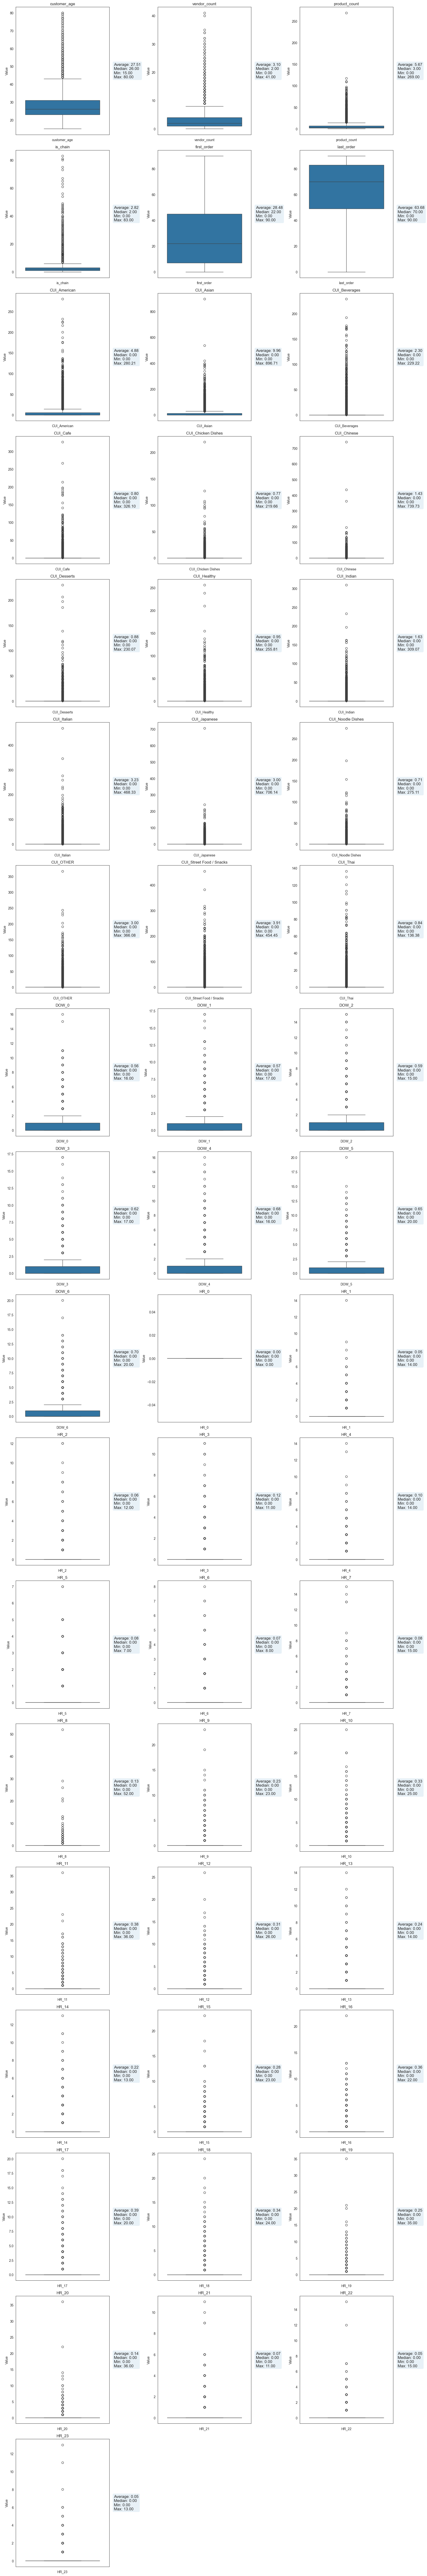

In [14]:
sns.set_style("white")

numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

n_cols = 3

n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    stats_text = (f'Average: {mean_value:.2f}\n'
                  f'Median: {median_value:.2f}\n'
                  f'Min: {min_value:.2f}\n'
                  f'Max: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.2.1 Box-Plots of the Mean of CUI's, DOW's, HR's

In this section, we present box plots to analyze the distribution of the mean values for key variables: Customer Unique Identifiers (CUI's), Days of the Week (DOW's), and Hours (HR's). 

By examining these plots, we aim to understand patterns such as peak engagement times (HR's), popular days for orders (DOW's), and variability in customer interactions (CUI's). This information is essential for identifying trends and optimizing strategies to cater to the behavior of different customer segments.

This grouping will be extremely useful because, as mentioned, the behavior of these 3 variables is extremely similar.

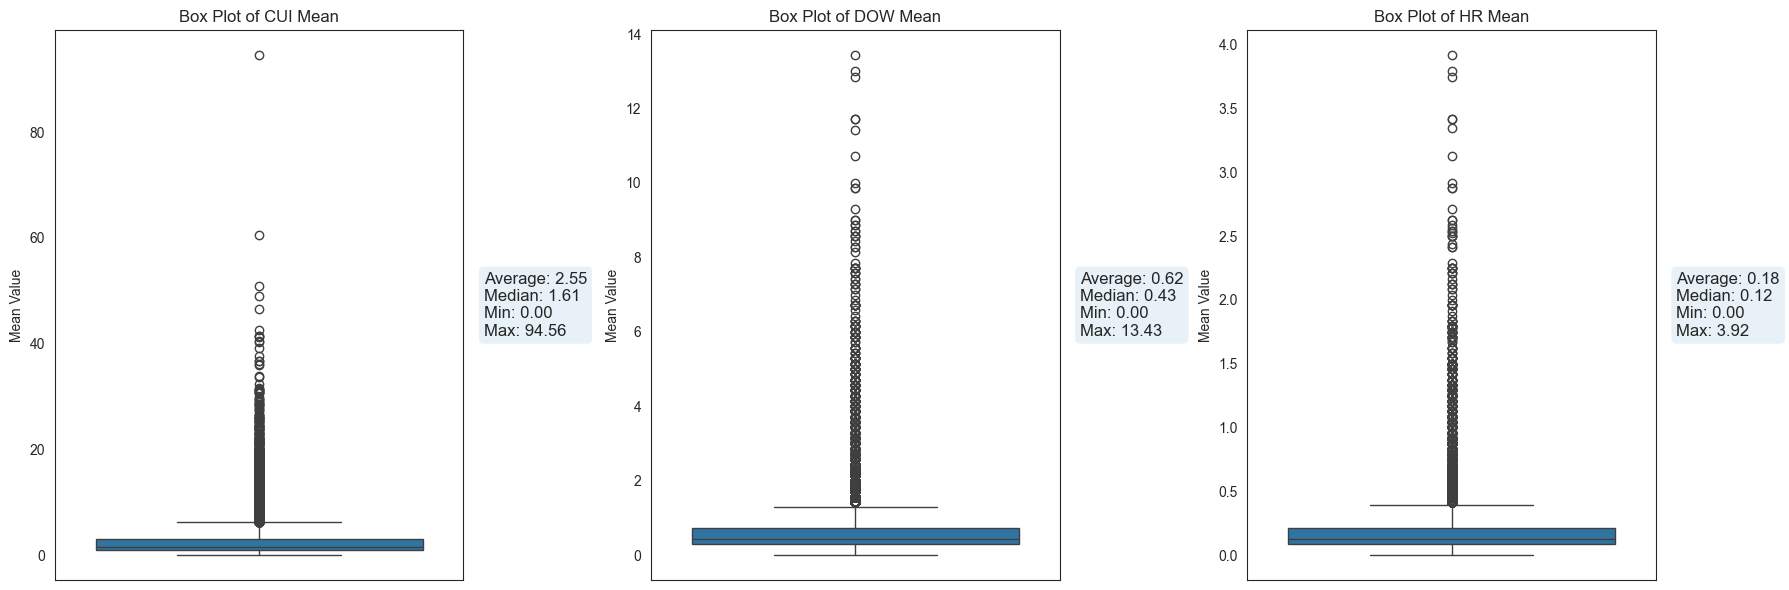

In [15]:
cui_vars = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 
    'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]

dow_vars = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

hr_vars = [
    'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 
    'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 
    'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 
    'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'
]


cui_mean = data[cui_vars].mean(axis=1)  
dow_mean = data[dow_vars].mean(axis=1)  
hr_mean = data[hr_vars].mean(axis=1)    

aggregated_means = pd.DataFrame({
    "CUI Mean": cui_mean,
    "DOW Mean": dow_mean,
    "HR Mean": hr_mean
})

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

mean_vars = ["CUI Mean", "DOW Mean", "HR Mean"]

for i, col in enumerate(mean_vars):
    sns.boxplot(y=aggregated_means[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_ylabel("Mean Value")
    
    
    mean_value = aggregated_means[col].mean()
    median_value = aggregated_means[col].median()
    min_value = aggregated_means[col].min()
    max_value = aggregated_means[col].max()
    
    stats_text = (f'Average: {mean_value:.2f}\n'
                  f'Median: {median_value:.2f}\n'
                  f'Min: {min_value:.2f}\n'
                  f'Max: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                 fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

plt.tight_layout()
plt.show()

### 2.3 Histrogram

Histograms provide a visual representation of the distribution of values for each variable. For each variable, we will create a histogram along with a summary box that displays the average value, median, minimum, and maximum values. These histograms help us understand the frequency distribution and shape (e.g., normal, skewed) of each variable, offering insights that will guide us in selecting appropriate analytical methods.

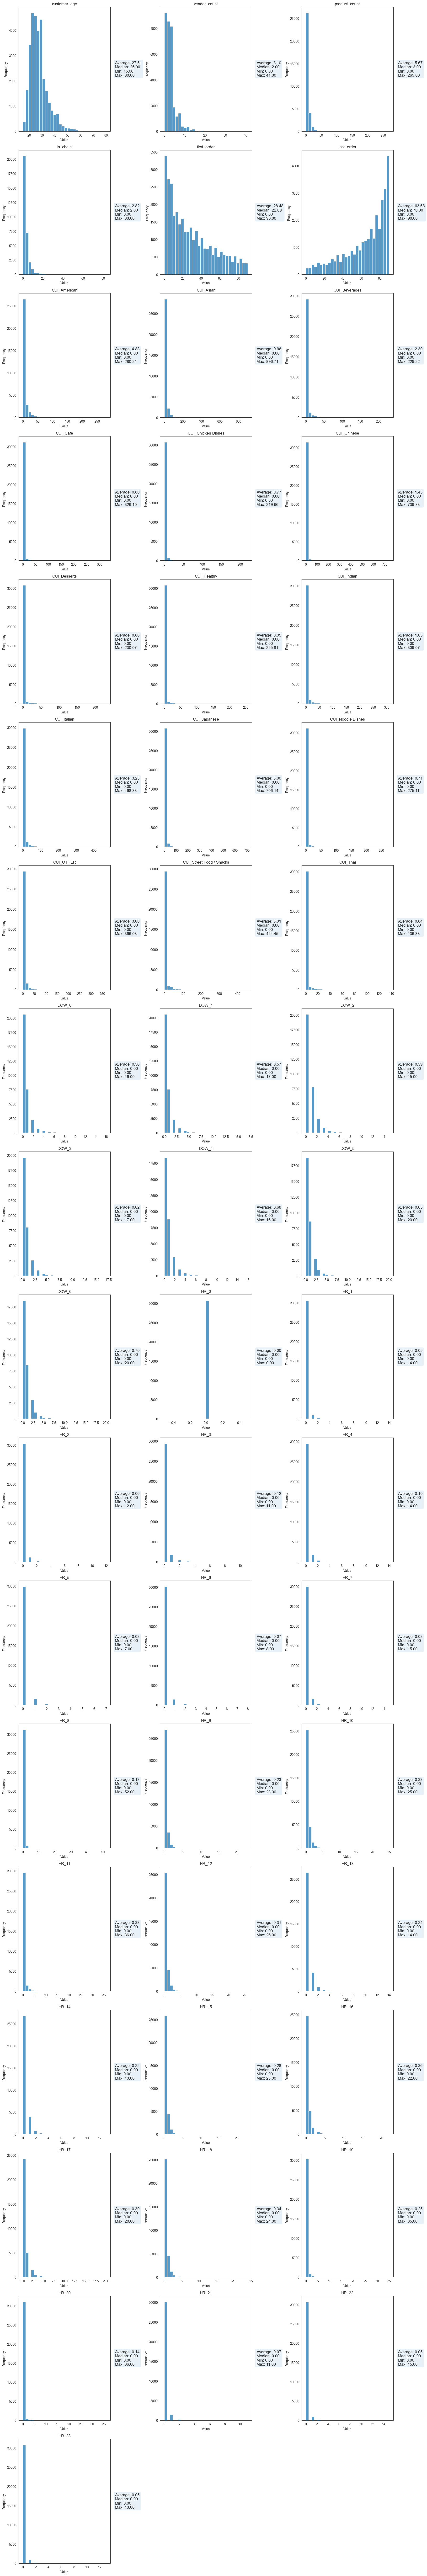

In [16]:
sns.set_style("white")

numeric_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if data[col].notna().any()]

n_cols = 3

n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, ax=axes[i], stat='count') 
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

    mean_value = data[col].mean()
    median_value = data[col].median()
    min_value = data[col].min()
    max_value = data[col].max()

    stats_text = (f'Average: {mean_value:.2f}\n'
                  f'Median: {median_value:.2f}\n'
                  f'Min: {min_value:.2f}\n'
                  f'Max: {max_value:.2f}')
    
    axes[i].text(1.05, 0.5, stats_text, transform=axes[i].transAxes, 
                  fontsize=12, verticalalignment='center', bbox=dict(boxstyle='round', alpha=0.1))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.4 Heatmaps


In this section, we use heatmaps to visually explore correlations and relationships within various groups of variables, including demographic variables, hourly (HR) variables, and interactions between CUI Foods and Days of the Week. Heatmaps are effective for identifying patterns and potential dependencies within groups of variables, as they represent correlations through color intensity, making it easier to spot strong or weak relationships at a glance.

Since there are quite a few numerical variables, we'll divide them into groups so that the heatmap isn't overloaded with unreadable information.

**Heatmap of Demographic variables**

The heatmap for demographic variables helps us understand correlations between age and other personal attributes, providing insights into how customer characteristics may influence behavior.

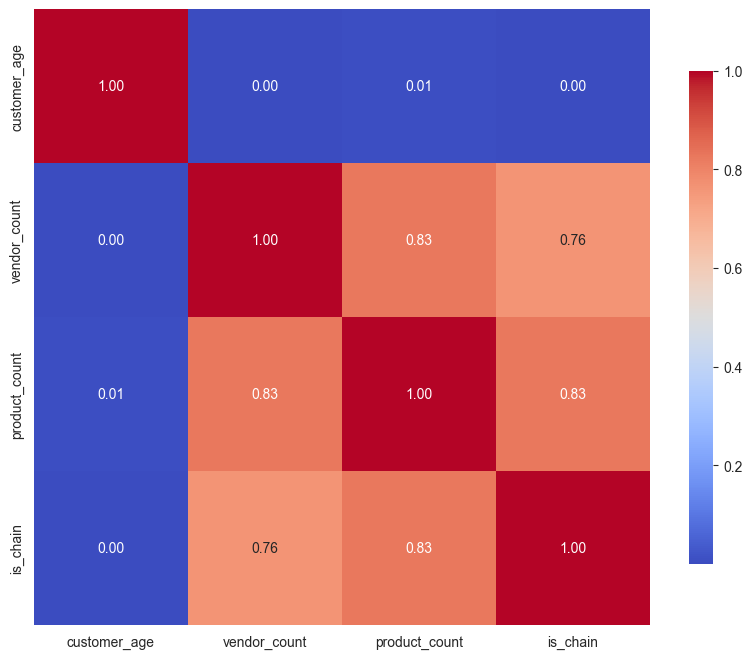

In [17]:
demographic_vars = ['customer_age', 'vendor_count', 'product_count', 'is_chain']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[demographic_vars].loc[demographic_vars], annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

We can see that there is a high correlation between product_count and sell_count (0.83), which could mean that the more products the customer has ordered, the greater the number of salespeople, which makes perfect sense.

is_chain also has a high correlation with sell_count and product_count, which could mean that when it's chain there are more salespeople and products sold to the customer.

**Heatmap of CUI Foods and the Days of the Week**

The heatmap for CUI Foods across Days of the Week reveals customer food preferences on different days, offering valuable information on customer trends and preferences over time.

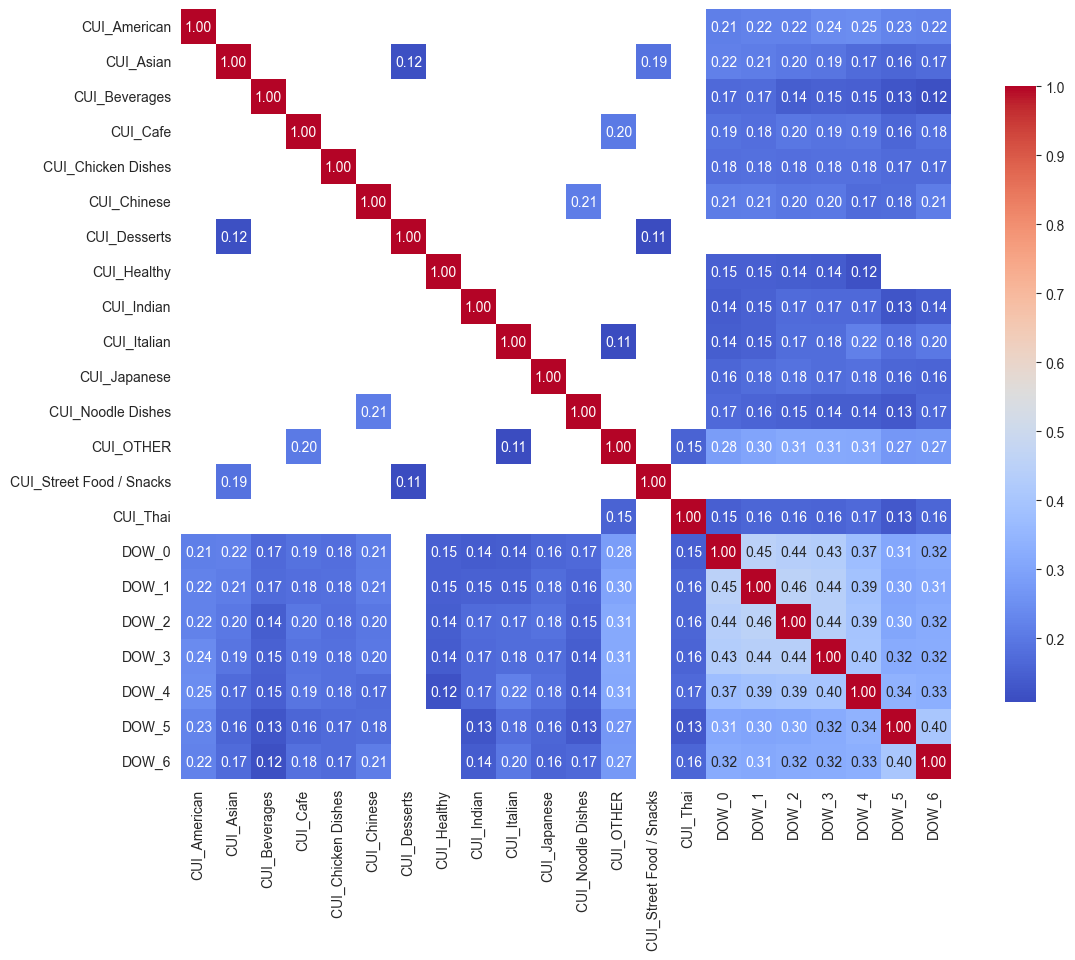

In [18]:
food_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 
    'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
    'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai'
]

day_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

selected_columns = food_columns + day_columns
correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            mask=correlation_matrix < 0.1, square=True, cbar_kws={"shrink": .8})
plt.show()

In this heatmap we can see that there isn't a huge correlation between food and time, but it is worth noting that there are some values above 0.4 between features on different days of the week, which may indicate that when, for example, there is an order on Sunday, there may be one on Monday, and this correlation is 0.45. These aren't super strong correlations, but they could mean something and be very important for valuable insights. We decided to mask the values below 0.10 so it is easier to understand the heatmap.

# 3. Create New Features

In this chapter, we focus on creating new features to enhance the dataset’s predictive power and capture more meaningful patterns. By engineering features based on existing variables, we can reveal hidden relationships, improve model performance, and better address our project objectives. This process is a key step in preparing our data for analysis, enabling us to extract deeper insights from the data.

**1) Age Category**

This segmentation can be valuable in tailoring promotions and communications for specific age demographics.

In [19]:
# Age Category
def age_group(age):
    if age < 18:
        return "Young"
    elif age < 65:
        return "Adult"
    else:
        return "Senior"

data["age_category"] = data["customer_age"].apply(age_group)

# Time between first purchase and last purchase
data["days_between_first_last_purchase"] = data["last_order"] - data["first_order"]

data.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,age_category,days_between_first_last_purchase
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,2,0,0,0,0,0,Adult,1.0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,Young,1.0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,Adult,1.0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,Senior,2.0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,Adult,2.0


**2) Order Frequency Per Customer**

Order Frequency per Customer: This feature can help ABCDEats understand the engagement level of each customer.

In [20]:
order_frequency = data.groupby('customer_id').size().reset_index(name='order_frequency')
print("Order Frequency Per Customer:\n", order_frequency.head())

Order Frequency Per Customer:
   customer_id  order_frequency
0      791320                1
1    31062744                1
2    41297859                1
3    52780172                1
4    70762364                1


**3) Average Order Value**

This metric allows segmentation of customers based on spending patterns, helping to identify high-value customers.

In [21]:
average_order_value = data.groupby('customer_id')['product_count'].mean().reset_index(name='average_order_value')
print("\nAverage Order Value Per Customer:\n", average_order_value.head())


Average Order Value Per Customer:
   customer_id  average_order_value
0      791320                  2.0
1    31062744                  3.0
2    41297859                  8.0
3    52780172                  3.0
4    70762364                  5.0


**4) High-Engagement Customer Flag**

This binary flag identifies customers whose order frequency or average order value is above the overall average. Customers with a high engagement flag could be potential candidates for loyalty programs or targeted retention strategies.

In [22]:
avg_order_frequency = order_frequency['order_frequency'].mean()
avg_order_value = average_order_value['average_order_value'].mean()

customer_engagement = order_frequency.merge(average_order_value, on='customer_id')

customer_engagement['high_engagement_flag'] = (
    (customer_engagement['order_frequency'] > avg_order_frequency) | 
    (customer_engagement['average_order_value'] > avg_order_value)
)

print("\nCustomer Engagement with High-Engagement Flag:\n", customer_engagement)


Customer Engagement with High-Engagement Flag:
       customer_id  order_frequency  average_order_value  high_engagement_flag
0          791320                1                  2.0                 False
1        31062744                1                  3.0                 False
2        41297859                1                  8.0                  True
3        52780172                1                  3.0                 False
4        70762364                1                  5.0                 False
...           ...              ...                  ...                   ...
31870  fffab78408                1                  1.0                 False
31871  fffb29d966                1                  5.0                 False
31872  fffc07f827                1                 18.0                  True
31873  ffff8f38f5                1                  4.0                 False
31874  ffffa3cd1a                1                  8.0                  True

[31875 rows x 

# 4. Identify Trends, Patterns, or Anomalies
In this chapter, our objective is to uncover underlying trends, patterns, and anomalies within the data. By systematically analyzing these elements, we can detect recurring behaviors, identify correlations, and highlight unusual values or outliers that might impact our analysis. Understanding these factors is essential in a data mining project, as they often reveal deeper insights and influence the accuracy of predictive models. This analysis will inform our feature engineering choices and guide us toward meaningful data transformations, ultimately enhancing the value and interpretability of our results.

### 4.1. Analysis of Identified Trends

**Pie Chart of Promotional Effectiveness**

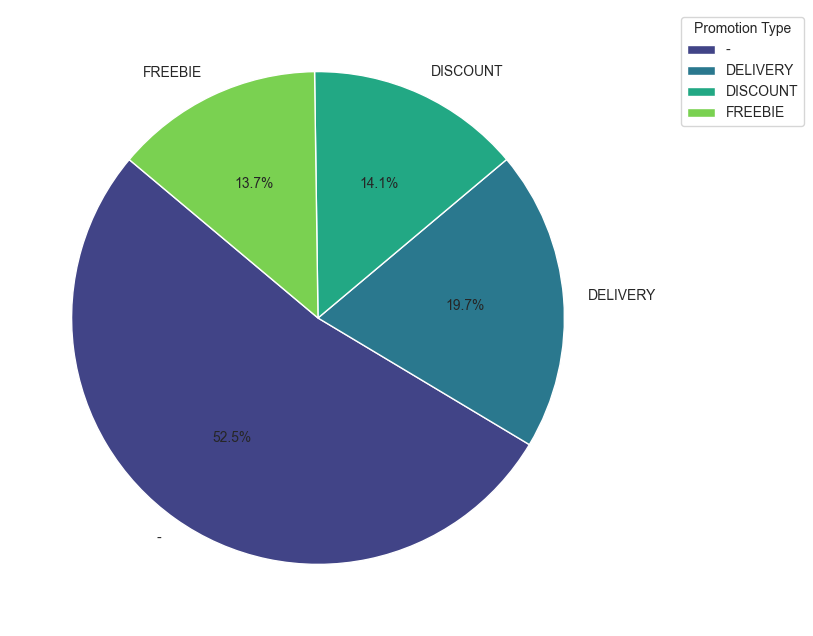

In [23]:
promo_counts = data['last_promo'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 8))
plt.pie(promo_counts.values, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(promo_counts)))


plt.legend(title="Promotion Type", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.show()

**Observations and Conclusions on Promotional Effectiveness**

Delivery: Among transactions with promotions, delivery-based incentives are the most popular, comprising 19.7% of total transactions. This popularity suggests that customers find value in delivery promotions, making them a potentially effective tool for boosting order volume or customer satisfaction.

Discount: Discounts account for 14.1% of transactions, reflecting a preference among some customers for direct savings. This type of promotion can appeal to price-sensitive customers and may be effective in attracting or retaining budget-conscious buyers.

Freebie: Freebie promotions make up 13.7% of the total transactions. Offering additional products or perks can enhance perceived value, fostering loyalty and encouraging repeat purchases.

The large proportion of transactions without promotions indicates that many customers are not dependent on incentives to make a purchase. Delivery promotions appear to resonate most with customers among the available options, suggesting an opportunity to emphasize or expand these types of incentives. Discounts and freebies also show value but may target different customer segments or purchase motivations.

**Horizontal Bar Plot of Payment Preferences**

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_36548\2738888778.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=payment_preferences.index, x=payment_preferences.values, palette="Blues")


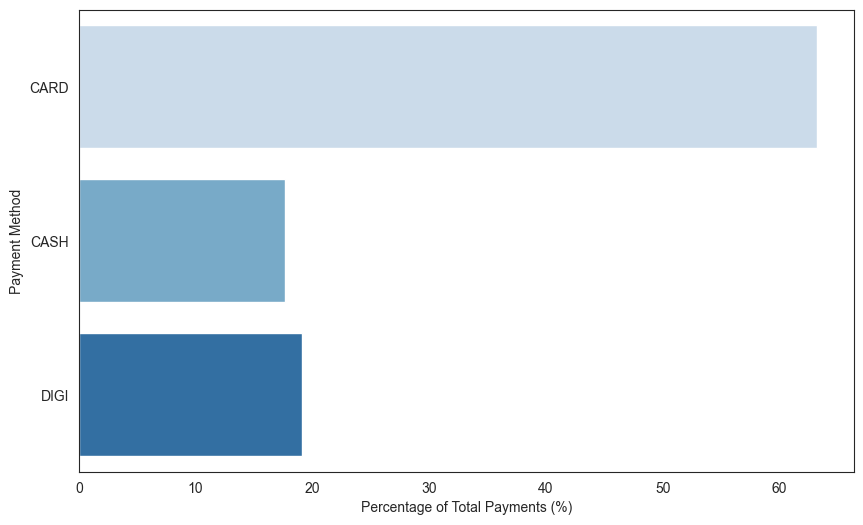

In [24]:
payment_preferences = data['payment_method'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(y=payment_preferences.index, x=payment_preferences.values, palette="Blues")
plt.xlabel("Percentage of Total Payments (%)")
plt.ylabel("Payment Method")
plt.show()

**Observations and Conclusions on Payment Preferences**

Dominant Payment Method - Card: The majority of customers (over 60%) prefer using card payments. This suggests that card payments are the most convenient or trusted method among the customer base, indicating a preference for traditional, secure payment options.

Digital Payments (Digi): Digital payments represent the second most popular payment method, accounting for a notable portion of transactions, though significantly less than card payments. This indicates a growing acceptance of digital payment options, which could be explored further to increase adoption.

Cash Payments: Cash payments are the least used, comprising a smaller percentage of transactions. This low percentage suggests that ABCDEats' customer base may lean towards cashless transactions, potentially due to the convenience and security offered by card and digital options.

This analysis of payment preferences provides insight into the financial behaviors of customers, which can guide strategic decisions regarding payment options and potential incentives.

### 4.2. Analysis of Identified Patterns

**Bar Chart of Regional Concentration**

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_36548\1176168050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_concentration.index, y=region_concentration.values, palette="coolwarm")


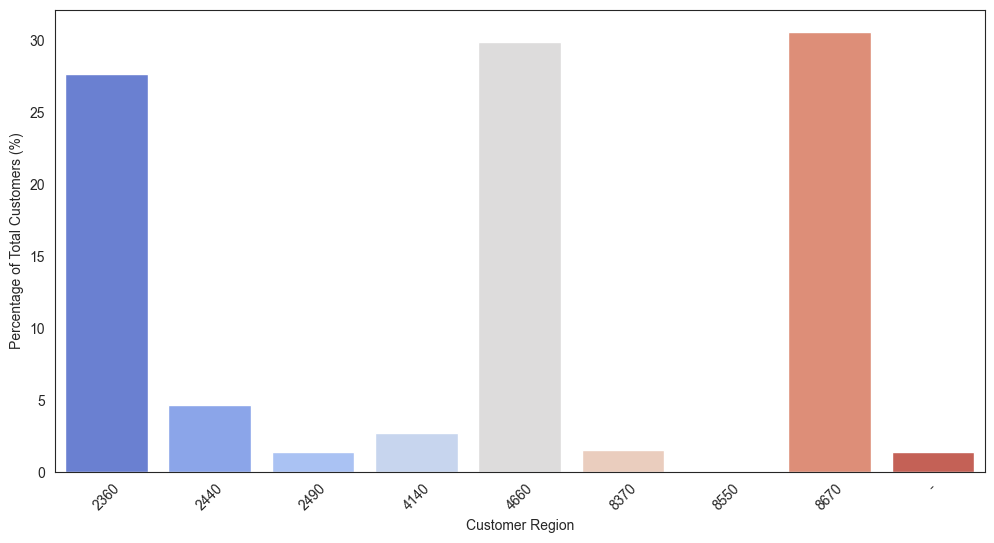

In [25]:
region_concentration = data['customer_region'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=region_concentration.index, y=region_concentration.values, palette="coolwarm")
plt.xlabel("Customer Region")
plt.ylabel("Percentage of Total Customers (%)")
plt.xticks(rotation=45)
plt.show()

High Concentration in Specific Regions: Three regions, labeled as 4660, 8670 and 2360, have the highest concentration of customers, each accounting for a significant portion of the total (around 25-30%). This suggests that these regions are key markets for ABCDEats, likely representing areas with high demand or strong brand presence.

Lower Representation in Other Regions: The remaining regions (2440, 2490, 4140, 8370) have relatively lower customer concentrations. These regions may represent emerging markets, areas with limited engagement, or places with lower demand for ABCDEats services.

Minimal Representation for Unspecified Region: A small percentage of customers are categorized under “-,” indicating missing or unspecified regional data. Ensuring completeness in regional data could provide a more accurate understanding of geographical distribution.

**Line Plot of Hourly Purchase Patterns**

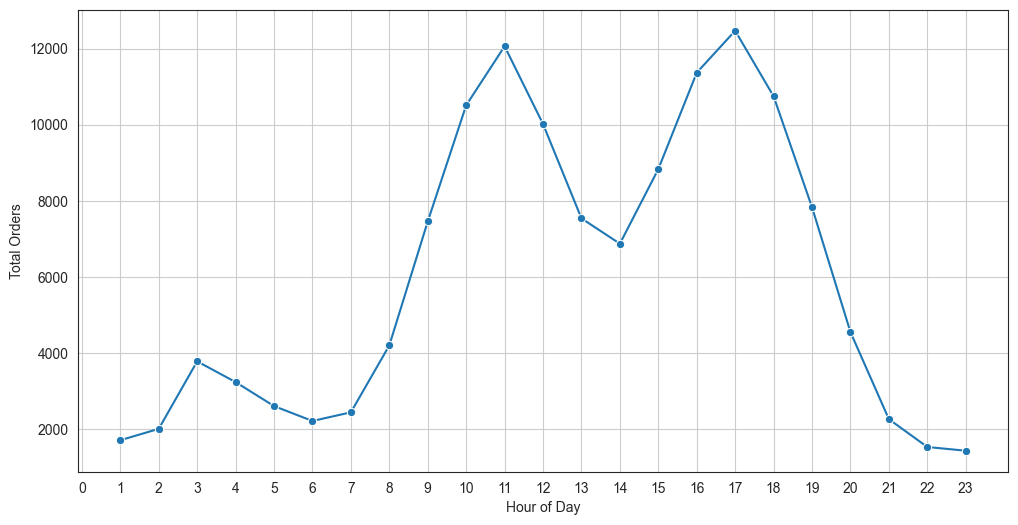

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

hr_vars = ['HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 
           'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 
           'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 
           'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']

hourly_totals = data[hr_vars].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_totals.index.str.replace('HR_', '').astype(int), y=hourly_totals.values, marker='o')
plt.xlabel("Hour of Day")
plt.ylabel("Total Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Observations on Hourly Order Trends**

Morning Peak (10:00 - 11:00 AM): There is a noticeable surge in orders starting around 9:00 AM, peaking between 10:00 and 11:00 AM with over 12,000 orders. This suggests a high demand for morning services, possibly related to breakfast, brunch, or early lunch orders.

Afternoon Decline (12:00 - 2:00 PM): Orders decline after the morning peak, reaching a low around noon to 2:00 PM. This pattern may indicate a natural break in customer activity, where fewer orders are placed during early afternoon hours.

Evening Peak (5:00 - 6:00 PM): Another peak occurs in the late afternoon and early evening, with orders increasing sharply from around 3:00 PM and reaching a second peak between 5:00 and 6:00 PM. This is likely driven by demand for dinner or early evening meals.

Late-Night Decline (After 8:00 PM): Order volume decreases significantly after 8:00 PM, with very few orders placed after 10:00 PM. This decline suggests limited late-night demand, possibly due to the target audience's lifestyle or operational hours of ABCDEats.

### 4.3. Analysis of Identified Anomalies

In this section, we focus on detecting anomalies within our dataset. Anomalies, or outliers, are values that deviate significantly from the majority of observations and may indicate data entry errors, rare events, or unique patterns. Identifying these values early on is crucial, as they can impact model performance and lead to misleading insights if not handled properly.

When we open the dataset, we notice that there are missing values and hyphen values, because there are blank values and others with only “-”. We need to correct this:

**Outliers**

In [27]:
missing_values = data.isnull().sum()
hyphen_counts = (data == '-').sum()

total_rows = data.shape[0]
missing_percentage = (missing_values / total_rows) * 100
hyphen_percentage = (hyphen_counts / total_rows) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Hyphen Values': hyphen_counts,
    'Missing %': missing_percentage,
    'Hyphen %': hyphen_percentage
})

missing_summary

,Missing Values,Hyphen Values,Missing %,Hyphen %
customer_id,0,0,0.000000,0.000000
customer_region,0,442,0.000000,1.386101
customer_age,727,0,2.279854,0.000000
vendor_count,0,0,0.000000,0.000000
product_count,0,0,0.000000,0.000000
is_chain,0,0,0.000000,0.000000
first_order,106,0,0.332413,0.000000
last_order,0,0,0.000000,0.000000
last_promo,0,16748,0.000000,52.521325
payment_method,0,0,0.000000,0.000000


**Undefined Region Data**

In [28]:
undefined_region_percentage = (data['customer_region'] == "-").mean() * 100
print("\nUndefined Region Data (%):", undefined_region_percentage)


Undefined Region Data (%): 1.3861013547415957


In [29]:
missing_first_order = data[data['first_order'].isnull() & (data['last_order'] != 0)]

if not missing_first_order.empty:
    print("Rows where ‘first_order’ is missing and ‘last_order’ is not 0:")
    print(missing_first_order)
else:
    print("There are no lines where ‘first_order’ is missing and ‘last_order’ is different from 0")

There are no lines where ‘first_order’ is missing and ‘last_order’ is different from 0


In [30]:
data["HR_0"].unique()

array([ 0., nan])

In future we'll deal with missing values and hyphen values

*Regarding the customer_region column, we understand that the hyphen values present may represent unknown values, so we will change the hyphen values to ‘Missing’*.

*Regarding the customer_age column, we understand that the missing values present represent that the age was not informed by the customer, so we will use a decision tree to give input to missing values.

*Regarding the first_order column, we understand that the missing values present represent 0 because whenever this happens, the last_order is also 0.

*Regarding the last_promo column, we see that there are more than 50% of the values with hyphen, which leaves us wondering whether to drop the column or not. If we don't, we'll replace these hyphen values with ‘No promo’*

*With regard to the HR_0 column, we realise that as there are 0 values and NaN values, the NaN values mean a lack of information, and as the 0 values are not relevant to our analysis, we will drop the column in question.

In [31]:
data.drop(columns=['HR_0'], inplace=True)

if 'HR_0' in number_var:
    number_var.remove('HR_0')

We need to verify if there are several lines with the same customer_id

In [32]:
first_column = data.columns[0] 
duplicates = data[data.duplicated(subset=[first_column], keep=False)] 

print(f"Repeats values in '{first_column}' column:")
print(duplicates[[first_column]].drop_duplicates()) 
print(f"\nTotal duplicates in '{first_column}' are {duplicates.shape[0]}")

Repeats values in 'customer_id' column:
      customer_id
3355   b55012ee1c
7867   24251eb7da
16227  671bf0c738
20855  742ca068fc
24328  df91183978
24822  6bbf5f74cd
25792  8aa9bbc147
27514  cf563a0a98
27653  201a13a34d
28706  06018a56be
29922  fac7984c0d
30402  b8e7a643a4
31639  cc08ef25ce

Total duplicates in 'customer_id' are 26


We will check whether the repeated rows with the same id have exactly the same values in the other variables or not

In [33]:
target_id = ["742ca068fc","b55012ee1c","24251eb7da","671bf0c738","df91183978","6bbf5f74cd","8aa9bbc147","cf563a0a98","201a13a34d","06018a56be","fac7984c0d","b8e7a643a4","cc08ef25ce"]

matching_rows = data[data[data.columns[0]].isin(target_id)]

pd.set_option("display.max_columns", None)  
pd.set_option("display.width", None) 

matching_rows

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,age_category,days_between_first_last_purchase
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult,87.0
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult,87.0
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,Adult,78.0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,Adult,78.0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,Adult,43.0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,Adult,43.0
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Adult,0.0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Adult,0.0
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult,5.0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult,5.0


We can see that the 26 lines with the repeated id are exactly the same in all the variables. So let's get rid of these repeated lines and keep just one:

In [34]:
data = data.drop_duplicates(subset=[first_column], keep='first')

data

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,age_category,days_between_first_last_purchase
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,Adult,1.0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Young,1.0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Adult,1.0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,Senior,2.0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Adult,NaN
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Senior,NaN
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Adult,NaN
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Adult,NaN


# 5. Conclusion

Based on the analysis of outliers and values that can be considered strange, we will also standardise the dataset in order to obtain more valuable and relevant conclusions. In the case of the numerical 
variables, as mentioned in the project report, the median value will be used in most cases, since, as has been observed in many boxplots, there are many outliers and many values that are out of line with the mean and median.

This analysis has provided ABCDEats with valuable insights into customer behavior and preferences:

Promotional Effectiveness: Delivery promotions are the most popular, suggesting an opportunity to increase engagement by focusing more on these types of promotions.

Payment Preferences: A strong preference for card payments aligns with cashless trends, indicating that ABCDEats should continue prioritizing card and digital payment options.

Regional Focus: With over 85% of customers concentrated in three main regions, targeting these areas could maximize marketing impact and operational efficiency.

Peak Ordering Times: Orders peak during midday and evening hours, highlighting ideal times for promotional campaigns and optimized resource allocation.

Recommendations: By leveraging these insights—prioritizing delivery promotions, supporting cashless payments, focusing on key regions, and aligning with peak times — ABCDEats can enhance customer engagement and streamline operations. This data-driven approach positions the company for strategic growth and improved customer satisfaction.

After dealing with the numerous outliers, anomalies, trends and patterns, in the next interaction we will not only make the changes we have mentioned, but also re-plot the numerous features in order to understand how the changes have affected the various features.
